In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv('../example data/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


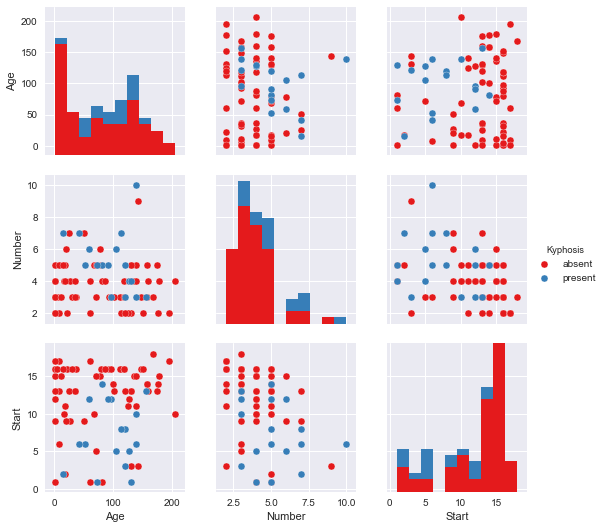

In [14]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

Data split

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(56, 3) (25, 3) (56,) (25,)


In [16]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Decision Tree

In [17]:
predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.77      0.89      0.83        19
    present       0.33      0.17      0.22         6

avg / total       0.67      0.72      0.68        25

[[17  2]
 [ 5  1]]


Random Forests¶

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))

print(classification_report(y_test,rfc_pred))


[[18  1]
 [ 5  1]]
             precision    recall  f1-score   support

     absent       0.78      0.95      0.86        19
    present       0.50      0.17      0.25         6

avg / total       0.71      0.76      0.71        25

